# Steps:

## Personality System

Five Personality Traits (OCEAN)

- Openness to experience (inventive/curious vs. consistent/cautious)
- Conscientiousness (efficient/organized vs. easy-going/careless)
- Extroversion (outgoing/energetic vs. solitary/reserved)
- Agreeableness (friendly/compassionate vs. challenging/detached)
- Neuroticism (sensitive/nervous vs. secure/confident)

Resources: 
- [wikipedia](https://en.wikipedia.org/wiki/Big_Five_personality_traits)
- [ipip.ori.org](https://ipip.ori.org/newBigFive5broadKey.htm)
- [How Accurately Can You Describe Yourself?](https://ipip.ori.org/new_ipip-50-item-scale.htm)
- [Dataset](https://www.kaggle.com/datasets/tunguz/big-five-personality-test)


### NOTES:
    
### https://www.kaggle.com/jagannathrk/resume-classification/notebook
### https://www.kaggle.com/dhainjeamita/resumedataset
### https://www.kaggle.com/jagannathrk/resume-classification
### https://www.kaggle.com/dhainjeamita/resume-classification
### https://www.kaggle.com/abdoragab/resume-classification
    
## Resume Classification

### https://www.kaggle.com/jagannathrk/resume-classification/notebook
### https://www.kaggle.com/mohamedabdelghani/baseline-modeling


# Personality System

#### read Codebook

In [58]:
# lib's
import numpy as np
import pandas as pd
import glob
import random

# for ploting
import matplotlib.pyplot as plt
import seaborn as sns

# clustering lib and Visualize the elbow
from sklearn.cluster import MiniBatchKMeans
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

# For ease of calculation, scale all the values between 0-1 
from sklearn.preprocessing import MinMaxScaler

import warnings
warnings.filterwarnings('ignore')

In [5]:
# df = pd.read_csv(r'dataset\\data-final.csv', delimiter='\t')
# df

In [6]:
# dataframe_list = [pd.read_csv(df_path) for df_path in glob.glob(r'dataset\data_final\*.csv')]
# print(dataframe_list)

In [7]:
df = pd.concat([pd.read_csv(df_path) for df_path in glob.glob(r'dataset\data_final\*.csv')])
df.reset_index(drop=True, inplace=True)
df

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,...,dateload,screenw,screenh,introelapse,testelapse,endelapse,IPC,country,lat_appx_lots_of_err,long_appx_lots_of_err
0,4.0,1.0,5.0,2.0,5.0,1.0,5.0,2.0,4.0,1.0,...,2016-03-03 02:01:01,768.0,1024.0,9.0,234.0,6,1,GB,51.5448,0.1991
1,3.0,5.0,3.0,4.0,3.0,3.0,2.0,5.0,1.0,5.0,...,2016-03-03 02:01:20,1360.0,768.0,12.0,179.0,11,1,MY,3.1698,101.706
2,2.0,3.0,4.0,4.0,3.0,2.0,1.0,3.0,2.0,5.0,...,2016-03-03 02:01:56,1366.0,768.0,3.0,186.0,7,1,GB,54.9119,-1.3833
3,2.0,2.0,2.0,3.0,4.0,2.0,2.0,4.0,1.0,4.0,...,2016-03-03 02:02:02,1920.0,1200.0,186.0,219.0,7,1,GB,51.75,-1.25
4,3.0,3.0,3.0,3.0,5.0,3.0,3.0,5.0,3.0,4.0,...,2016-03-03 02:02:57,1366.0,768.0,8.0,315.0,17,2,KE,1.0,38.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1015336,4.0,2.0,4.0,3.0,4.0,3.0,3.0,3.0,3.0,3.0,...,2018-11-08 12:04:58,1920.0,1080.0,3.0,160.0,10,2,US,39.9883,-75.2208
1015337,4.0,3.0,4.0,3.0,3.0,3.0,4.0,4.0,3.0,3.0,...,2018-11-08 12:07:18,1920.0,1080.0,3.0,122.0,7,1,US,38.0,-97.0
1015338,4.0,2.0,4.0,3.0,5.0,1.0,4.0,2.0,4.0,4.0,...,2018-11-08 12:07:49,1920.0,1080.0,2.0,135.0,12,6,US,36.1473,-86.777
1015339,2.0,4.0,3.0,4.0,2.0,2.0,1.0,4.0,2.0,4.0,...,2018-11-08 12:08:34,1920.0,1080.0,6.0,212.0,8,1,US,34.1067,-117.8067


In [8]:
columns = df.columns
print(columns)

for c in columns:
    print(c)

Index(['EXT1', 'EXT2', 'EXT3', 'EXT4', 'EXT5', 'EXT6', 'EXT7', 'EXT8', 'EXT9',
       'EXT10',
       ...
       'dateload', 'screenw', 'screenh', 'introelapse', 'testelapse',
       'endelapse', 'IPC', 'country', 'lat_appx_lots_of_err',
       'long_appx_lots_of_err'],
      dtype='object', length=110)
EXT1
EXT2
EXT3
EXT4
EXT5
EXT6
EXT7
EXT8
EXT9
EXT10
EST1
EST2
EST3
EST4
EST5
EST6
EST7
EST8
EST9
EST10
AGR1
AGR2
AGR3
AGR4
AGR5
AGR6
AGR7
AGR8
AGR9
AGR10
CSN1
CSN2
CSN3
CSN4
CSN5
CSN6
CSN7
CSN8
CSN9
CSN10
OPN1
OPN2
OPN3
OPN4
OPN5
OPN6
OPN7
OPN8
OPN9
OPN10
EXT1_E
EXT2_E
EXT3_E
EXT4_E
EXT5_E
EXT6_E
EXT7_E
EXT8_E
EXT9_E
EXT10_E
EST1_E
EST2_E
EST3_E
EST4_E
EST5_E
EST6_E
EST7_E
EST8_E
EST9_E
EST10_E
AGR1_E
AGR2_E
AGR3_E
AGR4_E
AGR5_E
AGR6_E
AGR7_E
AGR8_E
AGR9_E
AGR10_E
CSN1_E
CSN2_E
CSN3_E
CSN4_E
CSN5_E
CSN6_E
CSN7_E
CSN8_E
CSN9_E
CSN10_E
OPN1_E
OPN2_E
OPN3_E
OPN4_E
OPN5_E
OPN6_E
OPN7_E
OPN8_E
OPN9_E
OPN10_E
dateload
screenw
screenh
introelapse
testelapse
endelapse
IPC
country
lat_appx_lots_o

In [9]:
X = df[df.columns[0:50]]
X

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,...,OPN1,OPN2,OPN3,OPN4,OPN5,OPN6,OPN7,OPN8,OPN9,OPN10
0,4.0,1.0,5.0,2.0,5.0,1.0,5.0,2.0,4.0,1.0,...,5.0,1.0,4.0,1.0,4.0,1.0,5.0,3.0,4.0,5.0
1,3.0,5.0,3.0,4.0,3.0,3.0,2.0,5.0,1.0,5.0,...,1.0,2.0,4.0,2.0,3.0,1.0,4.0,2.0,5.0,3.0
2,2.0,3.0,4.0,4.0,3.0,2.0,1.0,3.0,2.0,5.0,...,5.0,1.0,2.0,1.0,4.0,2.0,5.0,3.0,4.0,4.0
3,2.0,2.0,2.0,3.0,4.0,2.0,2.0,4.0,1.0,4.0,...,4.0,2.0,5.0,2.0,3.0,1.0,4.0,4.0,3.0,3.0
4,3.0,3.0,3.0,3.0,5.0,3.0,3.0,5.0,3.0,4.0,...,5.0,1.0,5.0,1.0,5.0,1.0,5.0,3.0,5.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1015336,4.0,2.0,4.0,3.0,4.0,3.0,3.0,3.0,3.0,3.0,...,2.0,2.0,4.0,3.0,4.0,2.0,4.0,2.0,2.0,4.0
1015337,4.0,3.0,4.0,3.0,3.0,3.0,4.0,4.0,3.0,3.0,...,4.0,1.0,5.0,1.0,5.0,1.0,3.0,4.0,5.0,4.0
1015338,4.0,2.0,4.0,3.0,5.0,1.0,4.0,2.0,4.0,4.0,...,5.0,1.0,5.0,1.0,4.0,1.0,5.0,5.0,4.0,5.0
1015339,2.0,4.0,3.0,4.0,2.0,2.0,1.0,4.0,2.0,4.0,...,5.0,2.0,4.0,2.0,3.0,2.0,4.0,5.0,5.0,3.0


In [10]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1015341 entries, 0 to 1015340
Data columns (total 50 columns):
 #   Column  Non-Null Count    Dtype  
---  ------  --------------    -----  
 0   EXT1    1013558 non-null  float64
 1   EXT2    1013558 non-null  float64
 2   EXT3    1013558 non-null  float64
 3   EXT4    1013558 non-null  float64
 4   EXT5    1013558 non-null  float64
 5   EXT6    1013558 non-null  float64
 6   EXT7    1013558 non-null  float64
 7   EXT8    1013558 non-null  float64
 8   EXT9    1013558 non-null  float64
 9   EXT10   1013558 non-null  float64
 10  EST1    1013558 non-null  float64
 11  EST2    1013558 non-null  float64
 12  EST3    1013558 non-null  float64
 13  EST4    1013558 non-null  float64
 14  EST5    1013558 non-null  float64
 15  EST6    1013558 non-null  float64
 16  EST7    1013558 non-null  float64
 17  EST8    1013558 non-null  float64
 18  EST9    1013558 non-null  float64
 19  EST10   1013558 non-null  float64
 20  AGR1    1013558 non-null

In [11]:
round(X.describe(),2)

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,...,OPN1,OPN2,OPN3,OPN4,OPN5,OPN6,OPN7,OPN8,OPN9,OPN10
count,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,...,1013558.00,1013558.00,1013558.0,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00
mean,2.65,2.77,3.29,3.14,3.28,2.40,2.77,3.41,2.96,3.56,...,3.65,2.08,4.0,2.00,3.79,1.89,3.98,3.18,4.12,3.96
std,1.26,1.32,1.22,1.24,1.28,1.23,1.40,1.27,1.35,1.31,...,1.16,1.11,1.1,1.09,0.99,1.10,1.01,1.26,1.04,1.03
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,1.00,2.00,2.00,2.00,2.00,1.00,2.00,2.00,2.00,3.00,...,3.00,1.00,3.0,1.00,3.00,1.00,3.00,2.00,4.00,3.00
50%,3.00,3.00,3.00,3.00,3.00,2.00,3.00,4.00,3.00,4.00,...,4.00,2.00,4.0,2.00,4.00,2.00,4.00,3.00,4.00,4.00
75%,4.00,4.00,4.00,4.00,4.00,3.00,4.00,4.00,4.00,5.00,...,5.00,3.00,5.0,3.00,5.00,2.00,5.00,4.00,5.00,5.00
max,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,...,5.00,5.00,5.0,5.00,5.00,5.00,5.00,5.00,5.00,5.00


In [12]:
# plot missing values

# def plot_nas(df: pd.DataFrame):
#     if df.isnull().sum().sum() != 0:
#         na_df = (df.isnull().sum() / len(df)) * 100      
#         na_df = na_df.drop(na_df[na_df == 0].index).sort_values(ascending=False)
#         missing_data = pd.DataFrame({'Missing Ratio %' :na_df})
#         missing_data.plot(kind = "barh")
#         plt.show()
#     else:
#         print('No NAs found')
# plot_nas(df)

# https://dev.to/tomoyukiaota/visualizing-the-patterns-of-missing-value-occurrence-with-python-46dj

In [13]:
# No nan value : for safety purposes fill nan with 0
X = X.fillna(0)

In [14]:
# to find number of clusters
columns = list(X.columns)
scaler = MinMaxScaler(feature_range=(0,1))
data = scaler.fit_transform(X)
data = pd.DataFrame(data, columns=columns)
df_sample = data[:10000]
df_sample

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,...,OPN1,OPN2,OPN3,OPN4,OPN5,OPN6,OPN7,OPN8,OPN9,OPN10
0,0.8,0.2,1.0,0.4,1.0,0.2,1.0,0.4,0.8,0.2,...,1.0,0.2,0.8,0.2,0.8,0.2,1.0,0.6,0.8,1.0
1,0.6,1.0,0.6,0.8,0.6,0.6,0.4,1.0,0.2,1.0,...,0.2,0.4,0.8,0.4,0.6,0.2,0.8,0.4,1.0,0.6
2,0.4,0.6,0.8,0.8,0.6,0.4,0.2,0.6,0.4,1.0,...,1.0,0.2,0.4,0.2,0.8,0.4,1.0,0.6,0.8,0.8
3,0.4,0.4,0.4,0.6,0.8,0.4,0.4,0.8,0.2,0.8,...,0.8,0.4,1.0,0.4,0.6,0.2,0.8,0.8,0.6,0.6
4,0.6,0.6,0.6,0.6,1.0,0.6,0.6,1.0,0.6,0.8,...,1.0,0.2,1.0,0.2,1.0,0.2,1.0,0.6,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.4,0.6,0.4,0.6,0.4,0.8,0.4,0.8,0.2,1.0,...,0.4,0.6,0.6,0.4,0.8,0.8,0.8,0.2,0.6,0.6
9996,0.4,0.6,0.6,0.8,0.8,0.4,0.4,0.8,0.2,1.0,...,0.4,0.6,0.8,0.4,0.4,0.6,0.8,0.2,0.8,0.8
9997,0.8,0.8,0.6,0.6,0.6,0.6,0.2,0.8,0.6,0.6,...,0.4,0.4,0.4,0.4,0.8,0.4,0.8,0.6,0.6,0.8
9998,0.4,0.4,0.4,0.6,0.6,0.6,0.2,0.8,0.6,0.8,...,0.8,0.2,0.8,0.4,0.4,0.4,0.6,0.6,0.8,0.8


In [15]:
wcss = [] 
for i in range(1, 11): 
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 101)
    kmeans.fit(df_sample) 
    wcss.append(kmeans.inertia_)
    print(f"{i} : {kmeans.inertia_}")

1 : 29077.825359999915
2 : 26173.324126693715
3 : 24902.97495787551
4 : 24026.97263474902
5 : 23394.18999702124
6 : 23006.582337025815
7 : 22445.636228589945
8 : 22303.273501219624
9 : 21759.020613365512
10 : 21485.2241227621


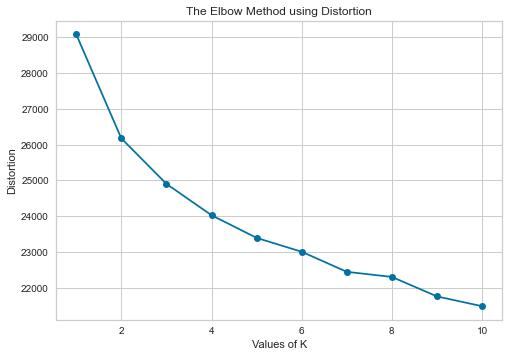

In [16]:
plt.plot(range(1, 11), wcss, 'bo-')
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.title('The Elbow Method using Distortion')
plt.show()

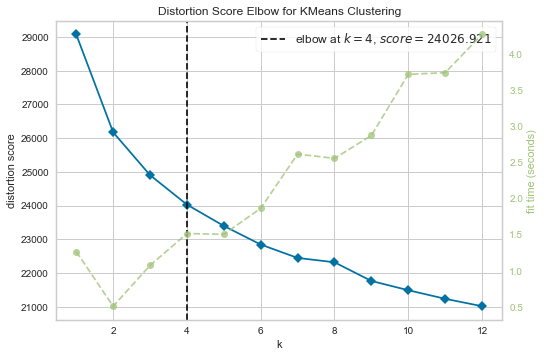

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [21]:
# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,13))

visualizer.fit(df_sample) # Fit the data to the visualizer
visualizer.show() # Finalize and render the figure

In [22]:
# MiniBatchKMeans clustering -- in unsupervised learning algorithms

kmeans = MiniBatchKMeans(n_clusters=10, random_state=0, batch_size=1000, max_iter=100).fit(data)

# n_clusters : number of personality type (in our case its 10 -- you can change it with any number of cluster)
# random_state : change as you want
# batch_size : the amount of data that is going to train at once or one at a time (feed the data in batches)
# max_iter : train the data at n times (in our case its 100 times)

In [23]:
# to check the number of cluster after model train

len(kmeans.cluster_centers_)

10

In [24]:
# to find personality types -- most common answer of each type or common answer pattern

one = kmeans.cluster_centers_[0]
two = kmeans.cluster_centers_[1]
three =kmeans.cluster_centers_[2]
four = kmeans.cluster_centers_[3]
five =kmeans.cluster_centers_[4]
six = kmeans.cluster_centers_[5]
seven = kmeans.cluster_centers_[6]
eight = kmeans.cluster_centers_[7]
nine= kmeans.cluster_centers_[8]
ten = kmeans.cluster_centers_[9]

In [25]:
all_types = {'one':one, 'two': two, 'three' :three, 'four':four, 'five':five, 'six': six, 'seven': seven, 'eight': eight,
             'nine': nine, 'ten': ten}

all_types_scores ={}

for name, personality_type in all_types.items():
    personality_trait = {}

    personality_trait['extroversion_score'] =  personality_type[0] - personality_type[1] + personality_type[2] - personality_type[3] + personality_type[4] - personality_type[5] + personality_type[6] - personality_type[7] + personality_type[8] - personality_type[9]
    personality_trait['neuroticism_score'] =  personality_type[0] - personality_type[1] + personality_type[2] - personality_type[3] + personality_type[4] + personality_type[5] + personality_type[6] + personality_type[7] + personality_type[8] + personality_type[9]
    personality_trait['agreeableness_score'] =  -personality_type[0] + personality_type[1] - personality_type[2] + personality_type[3] - personality_type[4] - personality_type[5] + personality_type[6] - personality_type[7] + personality_type[8] + personality_type[9]
    personality_trait['conscientiousness_score'] = personality_type[0] - personality_type[1] + personality_type[2] - personality_type[3] + personality_type[4] - personality_type[5] + personality_type[6] - personality_type[7] + personality_type[8] + personality_type[9]
    personality_trait['openness_score'] =  personality_type[0] - personality_type[1] + personality_type[2] - personality_type[3] + personality_type[4] - personality_type[5] + personality_type[6] + personality_type[7] + personality_type[8] + personality_type[9]
    
    all_types_scores[name] = personality_trait

In [26]:
all_types_scores

{'one': {'extroversion_score': -2.372896480911044,
  'neuroticism_score': 2.585692149724632,
  'agreeableness_score': 0.6106188742649145,
  'conscientiousness_score': -0.537324745636142,
  'openness_score': 1.170469523009428},
 'two': {'extroversion_score': 1.8856796531857847,
  'neuroticism_score': 4.574311220124351,
  'agreeableness_score': -0.5107324168615606,
  'conscientiousness_score': 2.83466145684787,
  'openness_score': 3.9551223546859853},
 'three': {'extroversion_score': -1.6968302857811213,
  'neuroticism_score': 2.9338687668135233,
  'agreeableness_score': 0.3681754974203033,
  'conscientiousness_score': 0.07639024263454419,
  'openness_score': 1.7821097638634424},
 'four': {'extroversion_score': 1.7625069449149668,
  'neuroticism_score': 4.487309438308832,
  'agreeableness_score': -0.32011111863947694,
  'conscientiousness_score': 2.8052876211125417,
  'openness_score': 3.8281861914763886},
 'five': {'extroversion_score': -0.6775624076876822,
  'neuroticism_score': 3.3306

In [27]:
all_extroversion = []
all_neuroticism =[]
all_agreeableness =[]
all_conscientiousness =[]
all_openness =[]

for personality_type, personality_trait in all_types_scores.items():
    all_extroversion.append(personality_trait['extroversion_score'])
    all_neuroticism.append(personality_trait['neuroticism_score'])
    all_agreeableness.append(personality_trait['agreeableness_score'])
    all_conscientiousness.append(personality_trait['conscientiousness_score'])
    all_openness.append(personality_trait['openness_score'])
    

In [28]:
all_extroversion_normalized = (all_extroversion-min(all_extroversion))/(max(all_extroversion)-min(all_extroversion))
all_neuroticism_normalized = (all_neuroticism-min(all_neuroticism))/(max(all_neuroticism)-min(all_neuroticism))
all_agreeableness_normalized = (all_agreeableness-min(all_agreeableness))/(max(all_agreeableness)-min(all_agreeableness))
all_conscientiousness_normalized = (all_conscientiousness-min(all_conscientiousness))/(max(all_conscientiousness)-min(all_conscientiousness))
all_openness_normalized = (all_openness-min(all_openness))/(max(all_openness)-min(all_openness))

In [30]:
all_extroversion_normalized, len(all_extroversion_normalized)

(array([0.        , 1.        , 0.15875405, 0.97107655, 0.39809881,
        0.396425  , 0.64253835, 0.57480233, 0.86065032, 0.25401911]),
 10)

In [31]:
counter = 0

normalized_all_types_scores ={}

for personality_type, personality_trait in all_types_scores.items():
    normalized_personality_trait ={}
    normalized_personality_trait['extroversion_score'] = all_extroversion_normalized[counter]
    normalized_personality_trait['neuroticism_score'] = all_neuroticism_normalized[counter]
    normalized_personality_trait['agreeableness_score'] = all_agreeableness_normalized[counter]
    normalized_personality_trait['conscientiousness_score'] = all_conscientiousness_normalized[counter]
    normalized_personality_trait['openness_score'] = all_openness_normalized[counter]
    
    normalized_all_types_scores[personality_type] = normalized_personality_trait
    
    counter+=1

In [32]:
normalized_all_types_scores

{'one': {'extroversion_score': 0.0,
  'neuroticism_score': 0.5393572233012398,
  'agreeableness_score': 1.0,
  'conscientiousness_score': 0.0,
  'openness_score': 0.2601958409856972},
 'two': {'extroversion_score': 1.0,
  'neuroticism_score': 1.0,
  'agreeableness_score': 0.0,
  'conscientiousness_score': 1.0,
  'openness_score': 1.0},
 'three': {'extroversion_score': 0.15875404685545325,
  'neuroticism_score': 0.6200086894692525,
  'agreeableness_score': 0.7837935544702855,
  'conscientiousness_score': 0.18200400340267883,
  'openness_score': 0.4226914989208648},
 'four': {'extroversion_score': 0.9710765513184981,
  'neuroticism_score': 0.9798469485937369,
  'agreeableness_score': 0.16999249007025383,
  'conscientiousness_score': 0.9912888624177377,
  'openness_score': 0.9662766214863349},
 'five': {'extroversion_score': 0.39809880576032325,
  'neuroticism_score': 0.7119190044452784,
  'agreeableness_score': 0.7119887122715784,
  'conscientiousness_score': 0.4126733128659435,
  'openn

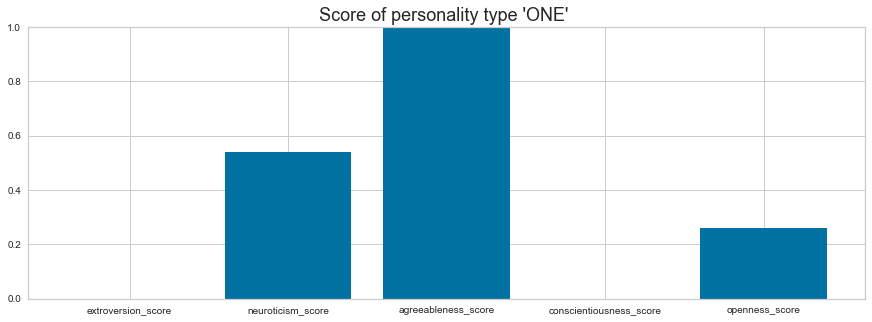

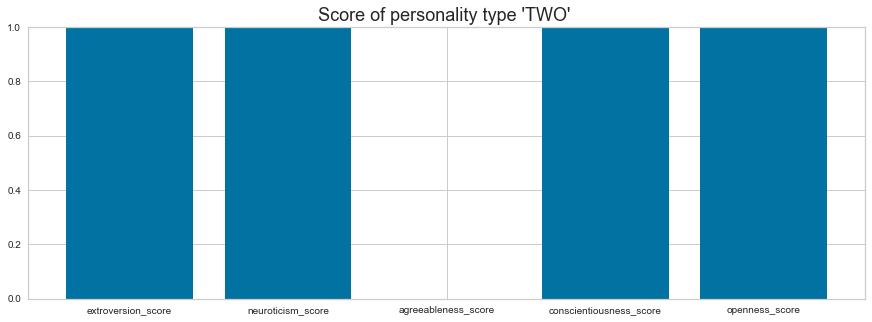

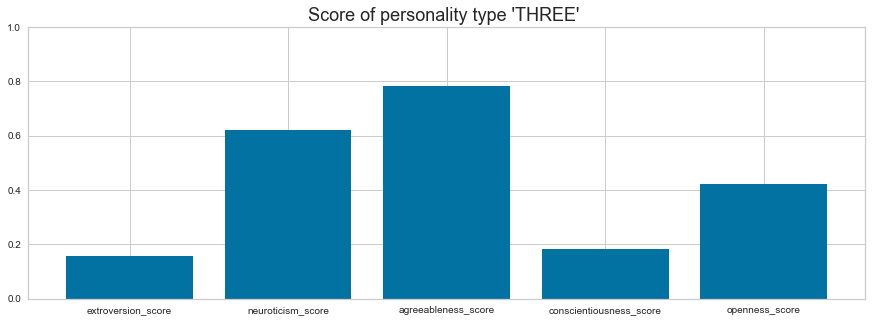

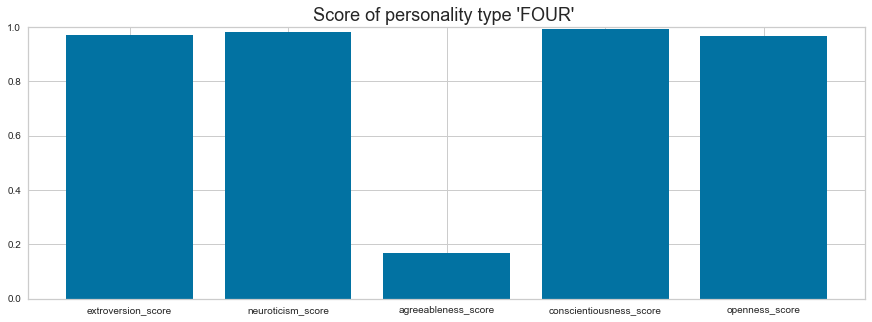

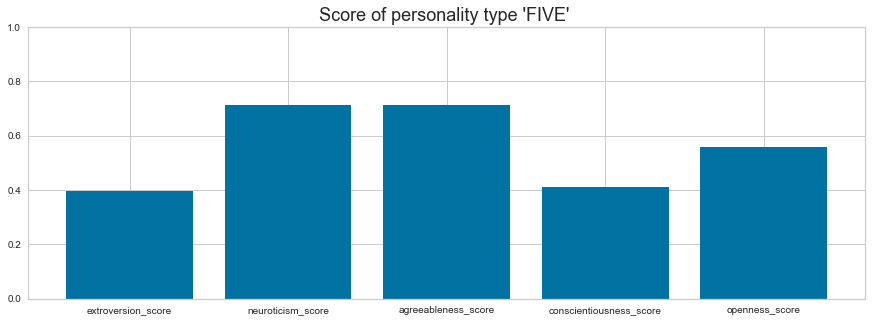

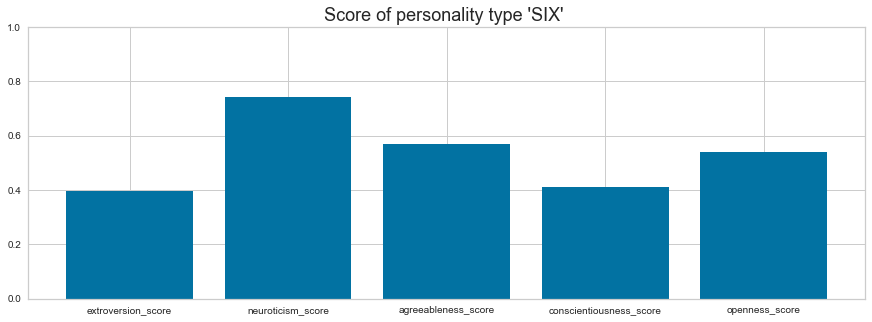

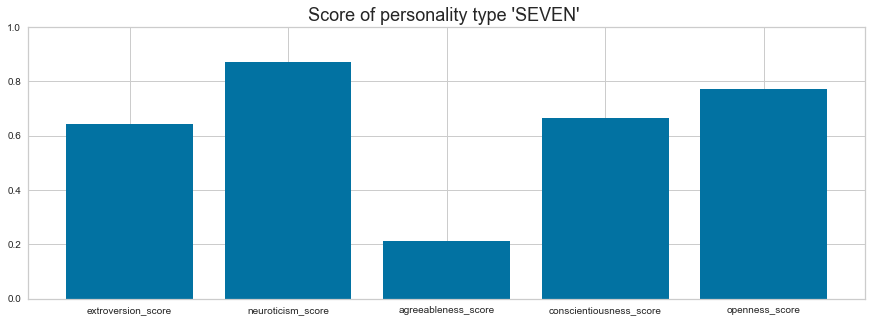

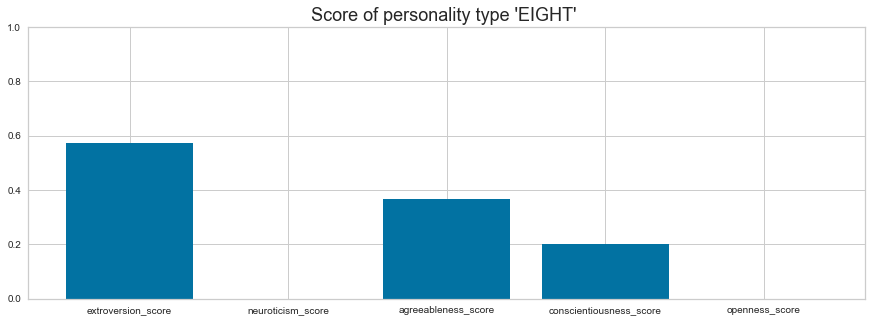

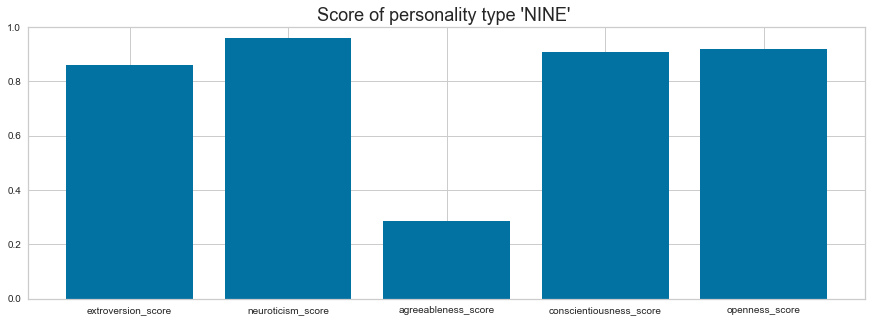

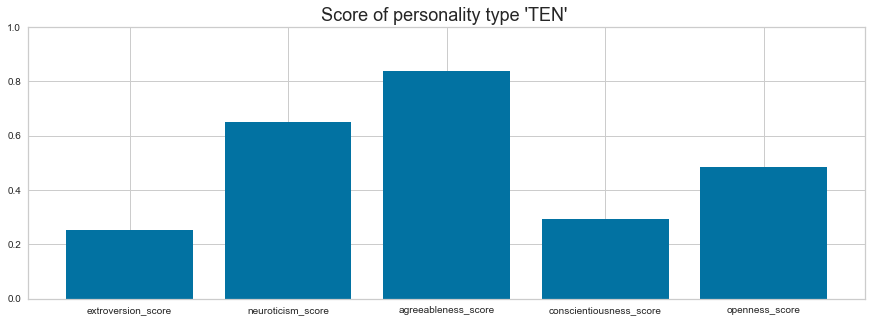

In [45]:
for k in all_types.keys():

    plt.figure(figsize=(15,5))
    plt.ylim(0, 1)
    plt.bar(list(normalized_all_types_scores[k].keys()), normalized_all_types_scores[k].values(), color='b')
    plt.title(f"Score of personality type '{k.upper()}' ", size=18)
    plt.show()

In [46]:
X

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,...,OPN1,OPN2,OPN3,OPN4,OPN5,OPN6,OPN7,OPN8,OPN9,OPN10
0,4.0,1.0,5.0,2.0,5.0,1.0,5.0,2.0,4.0,1.0,...,5.0,1.0,4.0,1.0,4.0,1.0,5.0,3.0,4.0,5.0
1,3.0,5.0,3.0,4.0,3.0,3.0,2.0,5.0,1.0,5.0,...,1.0,2.0,4.0,2.0,3.0,1.0,4.0,2.0,5.0,3.0
2,2.0,3.0,4.0,4.0,3.0,2.0,1.0,3.0,2.0,5.0,...,5.0,1.0,2.0,1.0,4.0,2.0,5.0,3.0,4.0,4.0
3,2.0,2.0,2.0,3.0,4.0,2.0,2.0,4.0,1.0,4.0,...,4.0,2.0,5.0,2.0,3.0,1.0,4.0,4.0,3.0,3.0
4,3.0,3.0,3.0,3.0,5.0,3.0,3.0,5.0,3.0,4.0,...,5.0,1.0,5.0,1.0,5.0,1.0,5.0,3.0,5.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1015336,4.0,2.0,4.0,3.0,4.0,3.0,3.0,3.0,3.0,3.0,...,2.0,2.0,4.0,3.0,4.0,2.0,4.0,2.0,2.0,4.0
1015337,4.0,3.0,4.0,3.0,3.0,3.0,4.0,4.0,3.0,3.0,...,4.0,1.0,5.0,1.0,5.0,1.0,3.0,4.0,5.0,4.0
1015338,4.0,2.0,4.0,3.0,5.0,1.0,4.0,2.0,4.0,4.0,...,5.0,1.0,5.0,1.0,4.0,1.0,5.0,5.0,4.0,5.0
1015339,2.0,4.0,3.0,4.0,2.0,2.0,1.0,4.0,2.0,4.0,...,5.0,2.0,4.0,2.0,3.0,2.0,4.0,5.0,5.0,3.0


In [53]:
data

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,...,OPN1,OPN2,OPN3,OPN4,OPN5,OPN6,OPN7,OPN8,OPN9,OPN10
0,0.8,0.2,1.0,0.4,1.0,0.2,1.0,0.4,0.8,0.2,...,1.0,0.2,0.8,0.2,0.8,0.2,1.0,0.6,0.8,1.0
1,0.6,1.0,0.6,0.8,0.6,0.6,0.4,1.0,0.2,1.0,...,0.2,0.4,0.8,0.4,0.6,0.2,0.8,0.4,1.0,0.6
2,0.4,0.6,0.8,0.8,0.6,0.4,0.2,0.6,0.4,1.0,...,1.0,0.2,0.4,0.2,0.8,0.4,1.0,0.6,0.8,0.8
3,0.4,0.4,0.4,0.6,0.8,0.4,0.4,0.8,0.2,0.8,...,0.8,0.4,1.0,0.4,0.6,0.2,0.8,0.8,0.6,0.6
4,0.6,0.6,0.6,0.6,1.0,0.6,0.6,1.0,0.6,0.8,...,1.0,0.2,1.0,0.2,1.0,0.2,1.0,0.6,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1015336,0.8,0.4,0.8,0.6,0.8,0.6,0.6,0.6,0.6,0.6,...,0.4,0.4,0.8,0.6,0.8,0.4,0.8,0.4,0.4,0.8
1015337,0.8,0.6,0.8,0.6,0.6,0.6,0.8,0.8,0.6,0.6,...,0.8,0.2,1.0,0.2,1.0,0.2,0.6,0.8,1.0,0.8
1015338,0.8,0.4,0.8,0.6,1.0,0.2,0.8,0.4,0.8,0.8,...,1.0,0.2,1.0,0.2,0.8,0.2,1.0,1.0,0.8,1.0
1015339,0.4,0.8,0.6,0.8,0.4,0.4,0.2,0.8,0.4,0.8,...,1.0,0.4,0.8,0.4,0.6,0.4,0.8,1.0,1.0,0.6


In [54]:
Y = kmeans.predict(data)

In [55]:
Y, len(Y)

(array([3, 2, 2, ..., 3, 2, 3]), 1015341)

In [57]:
df_with_labels = pd.DataFrame(X, columns=X.columns)
df_with_labels['personality_type'] = Y
df_with_labels

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,...,OPN2,OPN3,OPN4,OPN5,OPN6,OPN7,OPN8,OPN9,OPN10,personality_type
0,4.0,1.0,5.0,2.0,5.0,1.0,5.0,2.0,4.0,1.0,...,1.0,4.0,1.0,4.0,1.0,5.0,3.0,4.0,5.0,3
1,3.0,5.0,3.0,4.0,3.0,3.0,2.0,5.0,1.0,5.0,...,2.0,4.0,2.0,3.0,1.0,4.0,2.0,5.0,3.0,2
2,2.0,3.0,4.0,4.0,3.0,2.0,1.0,3.0,2.0,5.0,...,1.0,2.0,1.0,4.0,2.0,5.0,3.0,4.0,4.0,2
3,2.0,2.0,2.0,3.0,4.0,2.0,2.0,4.0,1.0,4.0,...,2.0,5.0,2.0,3.0,1.0,4.0,4.0,3.0,3.0,5
4,3.0,3.0,3.0,3.0,5.0,3.0,3.0,5.0,3.0,4.0,...,1.0,5.0,1.0,5.0,1.0,5.0,3.0,5.0,5.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1015336,4.0,2.0,4.0,3.0,4.0,3.0,3.0,3.0,3.0,3.0,...,2.0,4.0,3.0,4.0,2.0,4.0,2.0,2.0,4.0,5
1015337,4.0,3.0,4.0,3.0,3.0,3.0,4.0,4.0,3.0,3.0,...,1.0,5.0,1.0,5.0,1.0,3.0,4.0,5.0,4.0,9
1015338,4.0,2.0,4.0,3.0,5.0,1.0,4.0,2.0,4.0,4.0,...,1.0,5.0,1.0,4.0,1.0,5.0,5.0,4.0,5.0,3
1015339,2.0,4.0,3.0,4.0,2.0,2.0,1.0,4.0,2.0,4.0,...,2.0,4.0,2.0,3.0,2.0,4.0,5.0,5.0,3.0,2


In [152]:
# Visualizing the Cluster Predictions

# In order to visualize in 2D graph I will use PCA
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_fit = pca.fit_transform(X)

df_pca = pd.DataFrame(data=pca_fit, columns=['PCA1', 'PCA2'])
df_pca['Clusters'] = Y
df_pca.head()

,PCA1,PCA2,Clusters
0,-3.814702,-4.291713,3
1,-2.528542,2.743733,2
2,-2.774500,1.643860,2
3,1.077751,0.702213,5
4,-6.482637,-0.556004,1


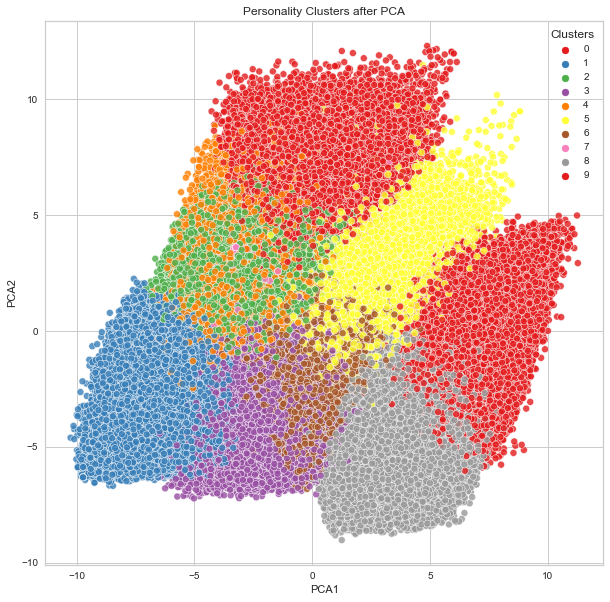

In [154]:
plt.figure(figsize=(10,10))
sns.scatterplot(data=df_pca, x='PCA1', y='PCA2', hue='Clusters', palette='Set1', alpha=0.8)
plt.title('Personality Clusters after PCA');

In [156]:
# Visualizing the Cluster Predictions

# In order to visualize in 2D graph I will use PCA
from sklearn.decomposition import PCA

pca = PCA(n_components=3)
pca_fit = pca.fit_transform(X)

df_pca = pd.DataFrame(data=pca_fit, columns=['PCA1', 'PCA2', 'PCA3'])
df_pca['Clusters'] = Y
df_pca.head()

,PCA1,PCA2,PCA3,Clusters
0,-3.814702,-4.291712,1.542556,3
1,-2.528542,2.743735,-1.817236,2
2,-2.774500,1.643861,-0.850432,2
3,1.077751,0.702214,2.041636,5
4,-6.482637,-0.556004,-4.194732,1


In [166]:
df_pca_1 = df_pca[:5000]

In [167]:
import plotly.express as px
fig = px.scatter_3d(df_pca_1, x='PCA1', y='PCA2', z='PCA3', color='Clusters')
fig.show()

In [68]:
# Implementing the Model to See My Personality
columns = ['EXT1', 'EXT2', 'EXT3', 'EXT4', 'EXT5', 'EXT6', 'EXT7', 'EXT8', 'EXT9', 'EXT10', 
           'EST1', 'EST2', 'EST3', 'EST4', 'EST5', 'EST6', 'EST7', 'EST8', 'EST9', 'EST10', 
           'AGR1', 'AGR2', 'AGR3', 'AGR4', 'AGR5', 'AGR6', 'AGR7', 'AGR8', 'AGR9', 'AGR10', 
           'CSN1', 'CSN2', 'CSN3', 'CSN4', 'CSN5', 'CSN6', 'CSN7', 'CSN8', 'CSN9', 'CSN10', 
           'OPN1', 'OPN2', 'OPN3', 'OPN4', 'OPN5', 'OPN6', 'OPN7', 'OPN8', 'OPN9', 'OPN10']

val1 = [random.randint(0,5) for ind in range(10)]
val2 = [random.randint(0,5) for ind in range(10)]
val3 = [random.randint(0,5) for ind in range(10)]
val4 = [random.randint(0,5) for ind in range(10)]
val5 = [random.randint(0,5) for ind in range(10)]
val = val1+val2+val3+val4+val5
len(val)

50

In [69]:
my_data = pd.DataFrame(data=[val], columns=columns)
my_data

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,...,OPN1,OPN2,OPN3,OPN4,OPN5,OPN6,OPN7,OPN8,OPN9,OPN10
0,2,3,0,0,1,5,2,2,3,3,...,5,1,1,0,1,2,3,2,0,0


In [70]:
my_data1 = scaler.transform(my_data)
my_data1

array([[0.4, 0.6, 0. , 0. , 0.2, 1. , 0.4, 0.4, 0.6, 0.6, 1. , 0.4, 0.8,
        0.8, 0.8, 0.4, 0.2, 0. , 0. , 0.6, 0.4, 1. , 0.4, 0.4, 0.2, 0.4,
        0.2, 0.6, 0.4, 0. , 0. , 1. , 0.4, 1. , 0.2, 0.4, 1. , 0.4, 0.8,
        0.2, 1. , 0.2, 0.2, 0. , 0.2, 0.4, 0.6, 0.4, 0. , 0. ]])

In [72]:
my_personality = kmeans.predict(my_data1)
print('My Personality Type Cluster is : ', my_personality)

My Personality Type Cluster is :  [5]


In [118]:
# Summing up the my question groups
col_list = list(my_data)

# ext = col_list[0:10]
# est = col_list[10:20]
# agr = col_list[20:30]
# csn = col_list[30:40]
# opn = col_list[40:50]


ext = list(my_data1[0][0:10])
est = list(my_data1[0][10:20])
agr = list(my_data1[0][20:30])
csn = list(my_data1[0][30:40])
opn = list(my_data1[0][40:50])

extroversion = round(ext[0] - ext[1] + ext[2] - ext[3] + ext[4] - ext[5] + ext[6] - ext[7] + ext[8] - ext[9], 2)
neurotic = round(est[0] - est[1] + est[2] - est[3] + est[4] + est[5] + est[6] + est[7] + est[8] + est[9], 2)
agreeable = round(-agr[0] + agr[1] - agr[2] + agr[3] - agr[4] - agr[5] + agr[6] - agr[7] + agr[8] + agr[9], 2)
conscientious = round(csn[0] - csn[1] + csn[2] - csn[3] + csn[4] - csn[5] + csn[6] - csn[7] + csn[8] + csn[9], 2)
open_ = round(opn[0] - opn[1] + opn[2] - opn[3] + opn[4] - opn[5] + opn[6] + opn[7] + opn[8] + opn[9], 2)

li = [extroversion, neurotic, agreeable, conscientious, open_]
scaled_data = (li - min(li)) / (max(li) - min(li))

my_sums = pd.DataFrame([scaled_data], 
                       columns=['extroversion', 'neurotic', 'agreeable', 'conscientious', 'open'])

my_sums['cluster'] = my_personality

print('Sum of my question groups')
my_sums

Sum of my question groups


,extroversion,neurotic,agreeable,conscientious,open,cluster
0,0.0,1.0,0.277778,0.222222,0.777778,5


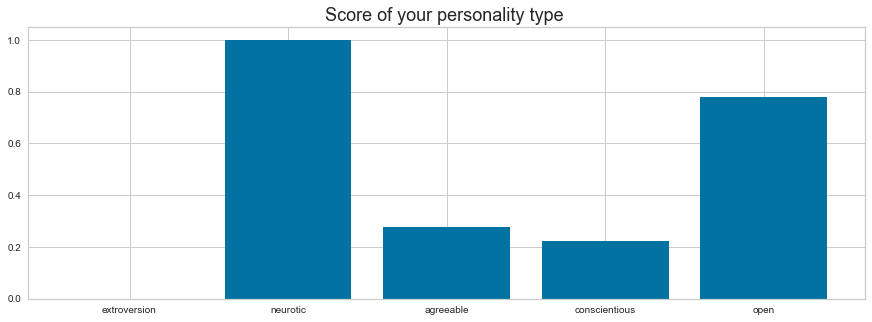

In [121]:
plt.figure(figsize=(15,5))
# plt.ylim(0, 1)
x_ax = my_sums.columns[:-1]
y_ax = my_sums.values[0][:-1]
plt.bar(x_ax, y_ax, color='b')
plt.title(f"Score of your personality type ", size=18)
plt.show()

In [122]:
import pickle

# save the MinMaxScaler to disk
filename = 'MinMaxScaler_for_personality_type.pkl'
pickle.dump(scaler, open(filename, 'wb'))

In [123]:
# save the Module to disk
filename = 'personality_type_model.pkl'
pickle.dump(kmeans, open(filename, 'wb'))

In [194]:
loaded_scaler = pickle.load(open('MinMaxScaler_for_personality_type.pkl', 'rb')) 
loaded_model = pickle.load(open('personality_type_model.pkl', 'rb')) 

# Implementing the Model to See My Personality
columns = ['EXT1', 'EXT2', 'EXT3', 'EXT4', 'EXT5', 'EXT6', 'EXT7', 'EXT8', 'EXT9', 'EXT10', 
           'EST1', 'EST2', 'EST3', 'EST4', 'EST5', 'EST6', 'EST7', 'EST8', 'EST9', 'EST10', 
           'AGR1', 'AGR2', 'AGR3', 'AGR4', 'AGR5', 'AGR6', 'AGR7', 'AGR8', 'AGR9', 'AGR10', 
           'CSN1', 'CSN2', 'CSN3', 'CSN4', 'CSN5', 'CSN6', 'CSN7', 'CSN8', 'CSN9', 'CSN10', 
           'OPN1', 'OPN2', 'OPN3', 'OPN4', 'OPN5', 'OPN6', 'OPN7', 'OPN8', 'OPN9', 'OPN10']

val1 = [random.randint(0,2) for ind in range(10)]
val2 = [random.randint(0,2) for ind in range(10)]
val3 = [random.randint(0,2) for ind in range(10)]
val4 = [random.randint(0,2) for ind in range(10)]
val5 = [random.randint(0,2) for ind in range(10)]
val = val1+val2+val3+val4+val5
print('length of val : ',len(val), val)

my_data = pd.DataFrame(data=[val], columns=columns)
my_data1 = loaded_scaler.transform(my_data)

my_personality = loaded_model.predict(my_data1)
print('My Personality Type Cluster is : ', my_personality)

# Summing up the my question groups
col_list = list(my_data)

ext = list(my_data1[0][0:10])
est = list(my_data1[0][10:20])
agr = list(my_data1[0][20:30])
csn = list(my_data1[0][30:40])
opn = list(my_data1[0][40:50])

extroversion = ext[0] - ext[1] + ext[2] - ext[3] + ext[4] - ext[5] + ext[6] - ext[7] + ext[8] - ext[9]
neurotic = est[0] - est[1] + est[2] - est[3] + est[4] + est[5] + est[6] + est[7] + est[8] + est[9]
agreeable = -agr[0] + agr[1] - agr[2] + agr[3] - agr[4] - agr[5] + agr[6] - agr[7] + agr[8] + agr[9]
conscientious = csn[0] - csn[1] + csn[2] - csn[3] + csn[4] - csn[5] + csn[6] - csn[7] + csn[8] + csn[9]
open_ = opn[0] - opn[1] + opn[2] - opn[3] + opn[4] - opn[5] + opn[6] + opn[7] + opn[8] + opn[9]

li = [extroversion, neurotic, agreeable, conscientious, open_]
scaled_data = (li - min(li)) / (max(li) - min(li))

my_sums = pd.DataFrame([scaled_data], 
                       columns=['extroversion', 'neurotic', 'agreeable', 'conscientious', 'open'])

my_sums['cluster'] = my_personality

print('Sum of my question groups')
my_sums

length of val :  50 [2, 0, 2, 1, 2, 0, 2, 2, 0, 0, 1, 0, 2, 2, 1, 1, 2, 0, 0, 0, 0, 1, 1, 2, 0, 1, 2, 0, 1, 2, 2, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 2, 0, 2, 0, 1, 0, 0]
My Personality Type Cluster is :  [7]
Sum of my question groups


,extroversion,neurotic,agreeable,conscientious,open,cluster
0,0.9,0.9,1.0,0.8,0.0,7


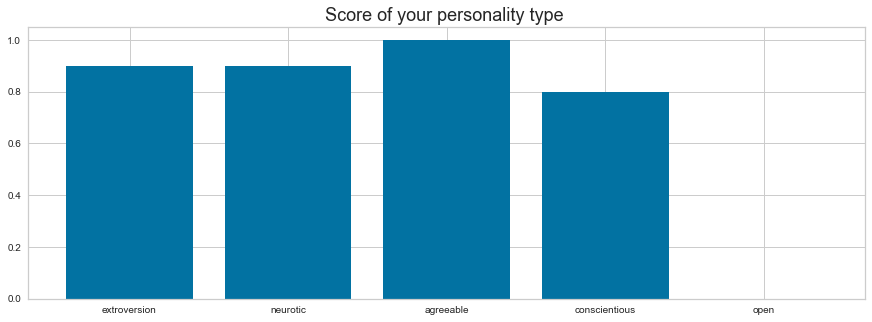

In [195]:
plt.figure(figsize=(15,5))
# plt.ylim(0, 1)
x_ax = my_sums.columns[:-1]
y_ax = my_sums.values[0][:-1]
plt.bar(x_ax, y_ax, color='b')
plt.title(f"Score of your personality type ", size=18)
plt.show()